In [1]:
FROM_CACHE = False

In [2]:
import winobias
from experiment import Model
from attention_utils import report_interventions_summary_by_head, report_interventions_summary_by_layer, report_intervention, perform_interventions
from transformers import GPT2Tokenizer
import json

## Dev Set Results (NOT filtering on odds ratio): 

In [3]:
model = Model(output_attentions=True)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
examples = winobias.load_dev_examples()
interventions = [ex.to_intervention(tokenizer) for ex in examples]

fname = 'winobias_data/attention_intervention_results.json'
if not FROM_CACHE:
	results = perform_interventions(interventions, model)
	with open(fname, 'w') as f:
		json.dump(results, f)
with open(fname) as f:
	results = json.load(f)

100%|██████████| 160/160 [1:31:58<00:00, 34.49s/it]


Split: DEV, Filtered: False
Loaded 160 pairs. Skipped 38 pairs.


### Mean Effect

*** SUMMARY BY HEAD ***
Num interventions: 160
Mean total effect: 0.11

INDIRECT Effect (mean = 0.0007698488051697631)
Top 10 heads:
   5 8: 0.030856243443323095 (p=0.0000)
   5 10: 0.021523376259847283 (p=0.0000)
   4 6: 0.019007864156901633 (p=0.0000)
   5 9: 0.017740232678352185 (p=0.0000)
   6 0: 0.007578525130691105 (p=0.0000)
   4 3: 0.006001237564987605 (p=0.0000)
   7 1: 0.004829585309767026 (p=0.0000)
   5 5: 0.0036240832406861045 (p=0.0003)
   7 5: 0.001215300783351836 (p=0.2965)
   7 3: 0.000899790431310521 (p=0.4381)

DIRECT Effect (mean = 0.11381596022722823)
Top 10 heads:
   5 8: 0.08365337535506115 (p=0.0498)
   5 10: 0.08950100453930646 (p=0.0921)
   5 9: 0.09623783454722741 (p=0.1687)
   4 6: 0.09903235448018677 (p=0.2099)
   6 0: 0.10596182064473396 (p=0.3341)
   7 1: 0.11000998288582195 (p=0.4178)
   5 5: 0.11147940160008148 (p=0.4493)
   4 3: 0.11245657938852674 (p=0.4704)
   6 4: 0.11315152583410963 (p=0.4855)
   7 5: 0.11332494071684777 (p=0.4893)


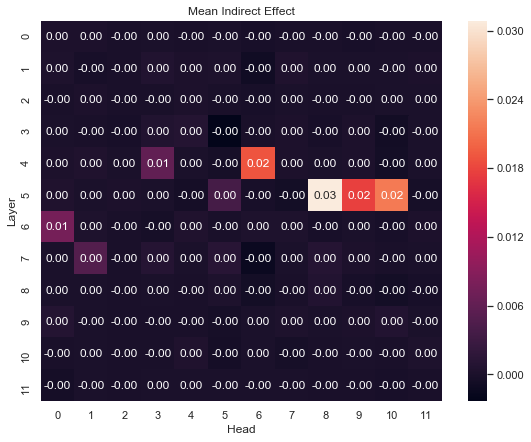

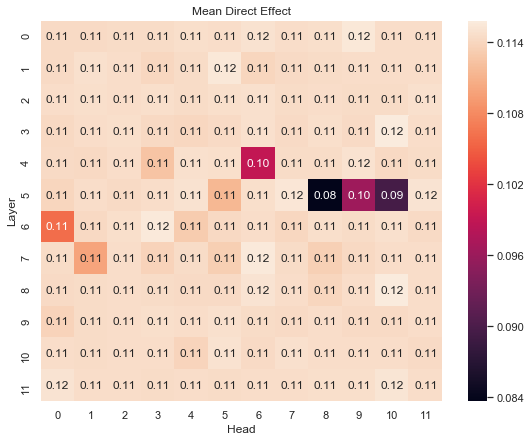

In [4]:
report_interventions_summary_by_head(results)

*** SUMMARY BY LAYER ***
Num interventions: 160
Mean total effect: 0.11


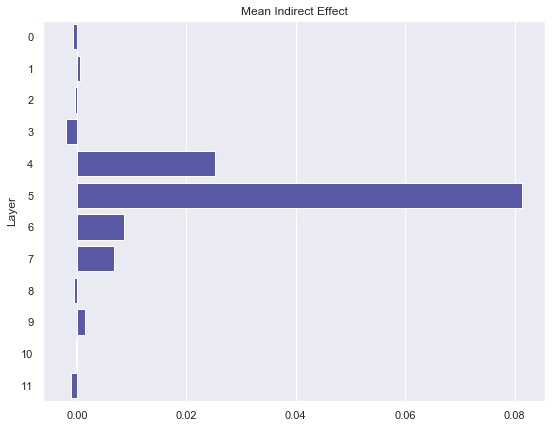

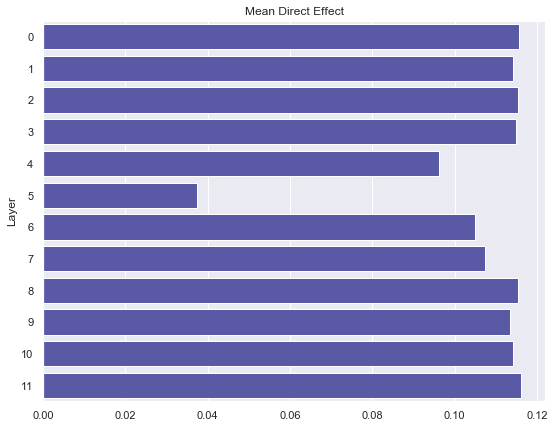

In [5]:
report_interventions_summary_by_layer(results)

### Examples
	

x : The mover said thank you to the housekeeper because she
x': The mover said thank you to the housekeeper because he
c1: cleaned the truck .
c2: is grateful .

p(c2|x) / p(c1|x) = 1.35200
p(c2|x') / p(c1|x') = 1.23163

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = -0.089


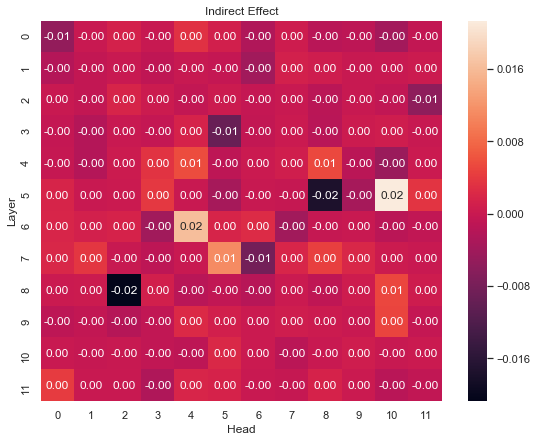

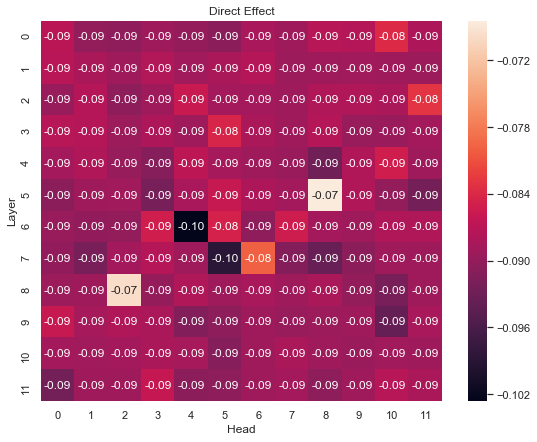

In [6]:
report_intervention(results[0])

x : The assistant scanned documents for the analyst because she
x': The assistant scanned documents for the analyst because he
c1: knows how to use the scan machine .
c2: asked .

p(c2|x) / p(c1|x) = 0.21893
p(c2|x') / p(c1|x') = 0.23095

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.055


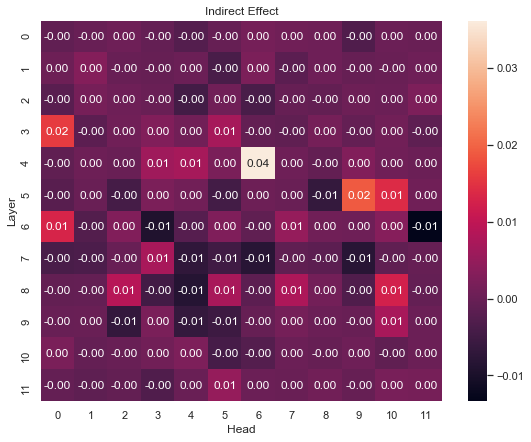

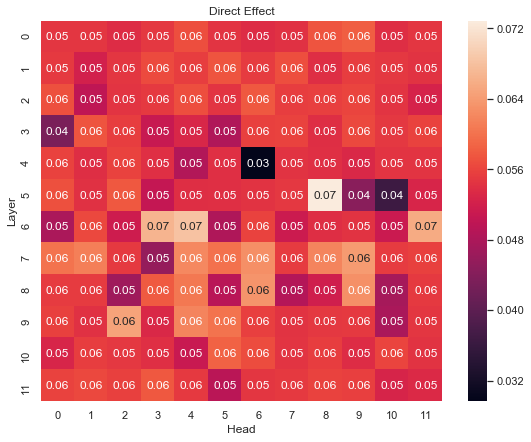

In [7]:
report_intervention(results[1])

x : The chief gave the housekeeper a tip because she
x': The chief gave the housekeeper a tip because he
c1: was helpful .
c2: was satisfied .

p(c2|x) / p(c1|x) = 0.86830
p(c2|x') / p(c1|x') = 1.04329

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.202


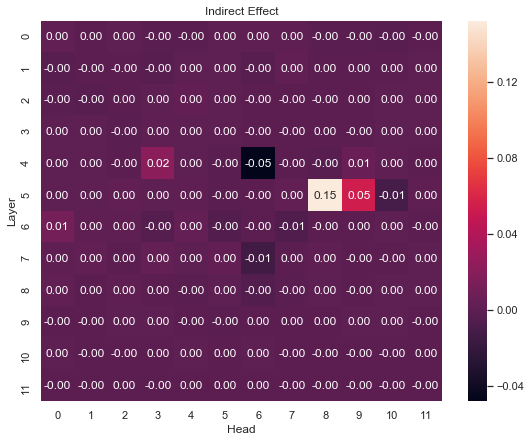

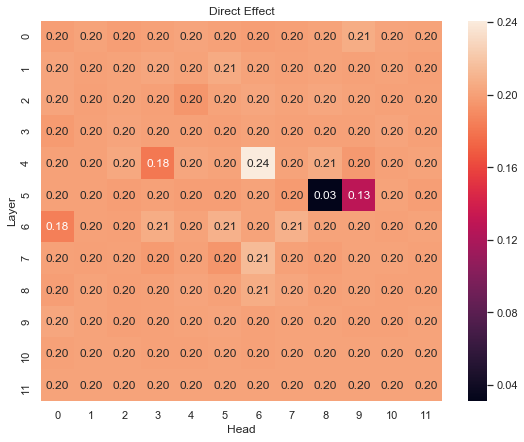

In [8]:
report_intervention(results[2])

x : The lawyer yelled at the hairdresser because she
x': The lawyer yelled at the hairdresser because he
c1: did a bad job .
c2: was mad .

p(c2|x) / p(c1|x) = 0.38992
p(c2|x') / p(c1|x') = 0.40757

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.045


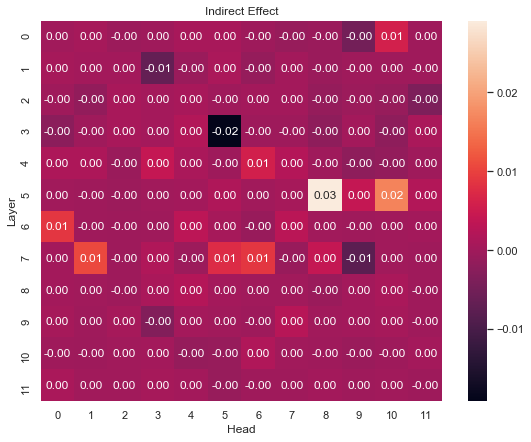

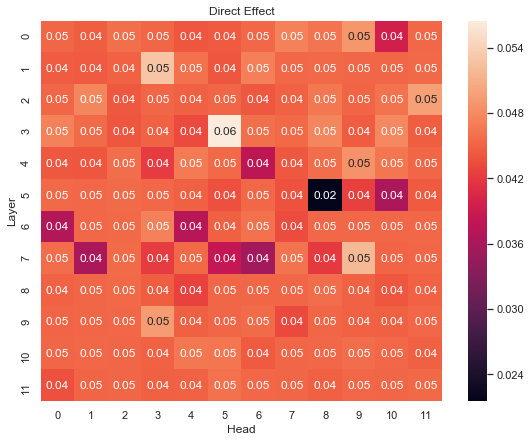

In [9]:
report_intervention(results[3])
